In [1]:
from __future__ import print_function

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24


In [ ]:
!pip install  histomicstk --user

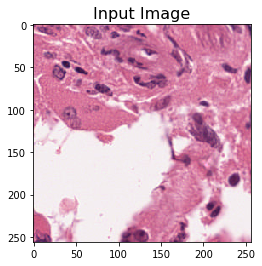

In [2]:
inputImageFile = ('/media/raj/Raj1_5/10ktiles/train/gbm/TCGA-02-0001-01Z-00-DX2_20x_4768_25216_256x256.png')  # H&E.png

imInput = skimage.io.imread(inputImageFile)[:, :, :3]

plt.imshow(imInput)
_ = plt.title('Input Image', fontsize=16)

In [3]:
imInput.shape

(256, 256, 3)

In [4]:
x, y, z = imInput.shape

image_2d = imInput.reshape(x*y, z)

image_2d.shape

(65536, 3)

In [5]:
from sklearn import cluster

In [8]:
kmeans_cluster = cluster.KMeans(n_clusters=7)

kmeans_cluster.fit(image_2d)

cluster_centers = kmeans_cluster.cluster_centers_

cluster_labels = kmeans_cluster.labels_

In [9]:
cluster_centers 

array([[156.93719356,  80.47443381, 129.62316134],
       [244.18668128, 236.5066494 , 238.84429945],
       [212.59071429, 125.706     , 162.29378571],
       [236.81876026, 192.60960591, 207.77606732],
       [108.13675214,  49.63752914, 103.90675991],
       [197.02473404, 104.67836879, 147.49680851],
       [223.88236686, 153.52804734, 182.16378698]])

In [ ]:
point = np.where(imInput ==(205, 237, 231))

In [ ]:
point

In [ ]:
len(point[0])

In [ ]:
center0_0x=[]
center0_1x=[]
center0_2x=[]
center0_0y=[]
center0_1y=[]
center0_2y=[]
for i in range(0,1736):
           if (point[2][i] == 0): center0_0x.append(point[0][i]), center0_0y.append(point[1][i])
           if (point[2][i] ==1): center0_1x.append(point[0][i]), center0_1y.append(point[1][i])
           if (point[2][i] ==2): center0_2x.append(point[0][i]), center0_2y.append(point[1][i]) 

In [ ]:
combined0_0 = np.vstack((center0_0x, center0_0y)).T

In [ ]:
len(combined0_0)

In [ ]:
combined0_0

In [ ]:
kmeans_cluster1 = cluster.KMeans(n_clusters=3)

kmeans_cluster.fit(combined0_0)

cluster_centers1= kmeans_cluster.cluster_centers_

cluster_labels1= kmeans_cluster.labels_

In [ ]:
cluster_centers1

In [ ]:
cluster_labels1

In [ ]:
len(cluster_labels1)

In [ ]:
combined0_0[0]

In [ ]:
cluster_labels1[0]

In [ ]:
center0=[]
center1=[]
center2=[]
for i in range(0,626):
           if (cluster_labels1[i] == 0): center0.append(combined0_0[i])
           if (cluster_labels1[i] == 1): center1.append(combined0_0[i])
           if (cluster_labels1[i] == 2): center2.append(combined0_0[i])

In [ ]:
center0

In [ ]:
len(center0)

In [ ]:
center1

In [ ]:
len(center1)

In [ ]:
len(center2)

In [ ]:
center0

In [ ]:
len(center0)+len(center1)+len(center2)

In [ ]:
import cv2

In [ ]:
import circle_fit as cf
xc_0,yc_0,r_0,_ = cf.least_squares_circle((center0))
xc_1,yc_1,r_1,_ = cf.least_squares_circle((center1))
xc_2,yc_2,r_2,_ = cf.least_squares_circle((center2))

In [ ]:
xc_0,yc_0,r_0,

In [ ]:
xc_1,yc_1,r_1

In [ ]:
xc_2,yc_2,r_2

In [ ]:
cv2.circle(imInput,(int(xc_0),int(yc_0)),int(r_0),3)
cv2.circle(imInput,(int(xc_1),int(yc_1)),int(r_1),3)
cv2.circle(imInput,(int(xc_2),int(yc_2)),int(r_2),3)

In [ ]:
cv2.imwrite("/home/gutmanlab/Downloads/papers/kmeans_circlefit1.jpg",imInput)

In [ ]:
optImageFile = ("/home/gutmanlab/Downloads/papers/kmeans_circlefit1.jpg")  # H&E.png

imInput4 = skimage.io.imread(optImageFile)[:, :, :3]

plt.imshow(imInput4)
_ = plt.title('Input Image', fontsize=16)

In [1]:
pip install  Image --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
i = Image.open('/home/gutmanlab/Downloads/papers/colon.jpeg')
frame2 = im.crop(((0,100, 125, 259)))
frame2.save('/home/gutmanlab/Downloads/papers/sub_colon1.jpeg')

NameError: name 'Image' is not defined